<a href="https://colab.research.google.com/github/RamakrishnaJoshi5/Training-Students5/blob/main/ARIMA__Car_Sales_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Time Series Forecasting**

In [41]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt 
from pandas import read_csv

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


            Sales
Month            
2016-01-01    266
2016-02-01    146
2016-03-01    183
2016-04-01    119
2016-05-01    180


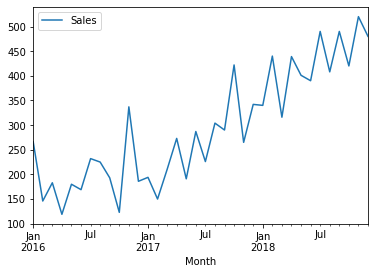

In [51]:
def parser(x):
	return datetime.strptime(x,'%Y-%m')

sales = pd.read_csv('sales-cars.csv',index_col=0, parse_dates=[0] ,date_parser=parser)
print(sales.head())
sales.plot()
plt.show()

In [52]:
sales.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


**Stationary **

Means mean , variance and covariance over a period of time

**obesrvation **

Increase in the sales over a period of time therefore it is difficult for us to analyze the data, we need to bring the data to statinarity form 

In [57]:
# converting series to stationary by taking difference of a series 


sales_diff= sales.diff(periods=1)


# integrated of order 1 , denoted by d (difference), one of the parameter of ARIMA 

In [58]:
sales_diff.head()

,Sales
Month,
2016-01-01,NaN
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0


In [61]:
sales_diff = sales_diff[1:]
sales_diff.head()

,Sales
Month,
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0
2016-06-01,-11.0
2016-07-01,63.0


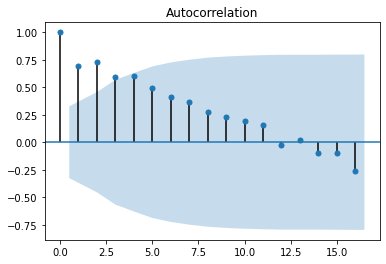

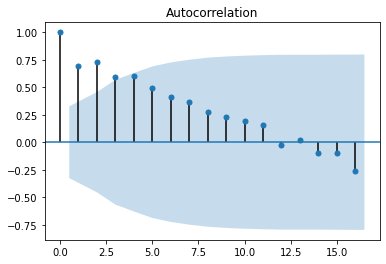

In [63]:
# ACF plot Autocorrelation function


from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sales)

Observation :

The series is slowly decaying , which gives the proof that the given series is not stationary

We need stationary data to do time series forecasting

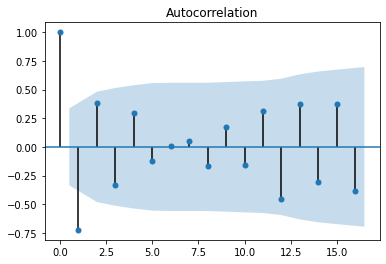

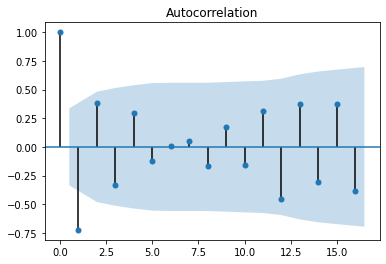

In [66]:
plot_acf(sales_diff)

Observation :

The above values of the slaes difference plot shows that the result in a stationary data and this is good for time series analysis 

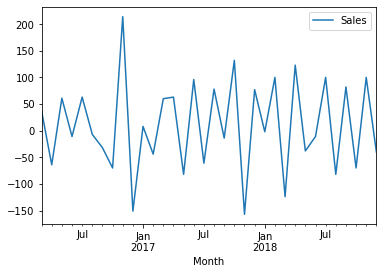

In [67]:
sales_diff.plot()

In [72]:
X = sales.values
X
X.size

predictions = []

36

In [77]:
train= X[0:27]
test= X[27:]

predictions = []

In [74]:
train

array([[266],
       [146],
       [183],
       [119],
       [180],
       [169],
       [232],
       [225],
       [193],
       [123],
       [337],
       [186],
       [194],
       [150],
       [210],
       [273],
       [191],
       [287],
       [226],
       [304],
       [290],
       [422],
       [265],
       [342],
       [340],
       [440],
       [316]])

In [80]:
test

array([[439],
       [401],
       [390],
       [490],
       [408],
       [490],
       [420],
       [520],
       [480]])

In [76]:
train.size

27

In [75]:

test.size

9

**`AUTOREGGRESIVE AR Model`**

In [78]:
# simple AR model 

from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

model_ar = AR(train)
model_ar_fit = model_ar.fit()




In [83]:
predictions=model_ar_fit.predict(start=27,end=36)

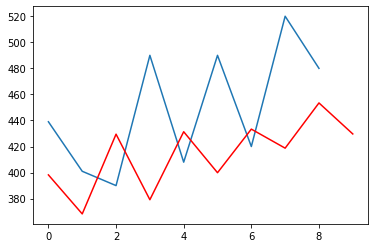

In [84]:
plt.plot(test)
plt.plot(predictions, color='red')

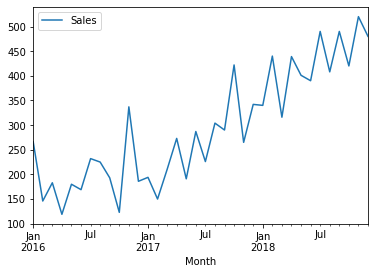

In [85]:
sales.plot()

Observation :

We have considered the last 9 readings we can easily compare both the graphs 

**ARIMA  Model`**

In [86]:
from statsmodels.tsa.arima_model import ARIMA

p= periods taken for AR model ( number of points taken for regression)
d=order of integeration , how many difference is done 
q periods in moving average

In [126]:
model_arima= ARIMA(train, order = (3,2,0))
model_arima_fit = model_arima.fit()

print(model_arima_fit.aic)

299.40758681557804


In [127]:
predictions = model_arima_fit.forecast(steps=9)
predictions

(array([431.25729519, 399.19950832, 464.94145933, 415.41457358,
        509.89040151, 480.13987686, 545.70817475, 530.927466  ,
        605.59692231]),
 array([ 75.15446307,  93.49072681, 127.55683164, 161.33621631,
        214.39952094, 253.17235439, 306.4493937 , 356.59978906,
        416.00174737]),
 array([[ 283.9572543 ,  578.55733608],
        [ 215.96105089,  582.43796576],
        [ 214.93466334,  714.94825533],
        [  99.20140022,  731.62774694],
        [  89.67506216,  930.10574086],
        [ -16.06881962,  976.34857335],
        [ -54.9216    , 1146.33794949],
        [-167.99527745, 1229.85020944],
        [-209.75152005, 1420.94536466]]))

In [129]:
predictions = model_arima_fit.forecast(steps=10)[0]
predictions

array([431.25729519, 399.19950832, 464.94145933, 415.41457358,
       509.89040151, 480.13987686, 545.70817475, 530.927466  ,
       605.59692231, 594.27591225])

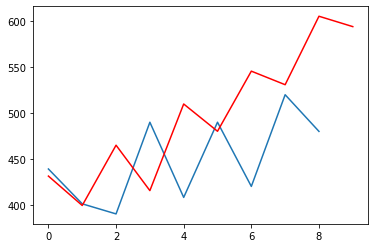

In [130]:
plt.plot(test)
plt.plot(predictions, color='red')

In [112]:
import itertools

p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [121]:
import warnings
warnings.filterwarnings("ignore")



for param in pdq:

  try:
    model_arima= ARIMA(train, order = param)
    model_arima_fit = model_arima.fit()
    print(param,model_arima_fit.aic)

  except:
    continue

(0, 0, 0) 319.45285852307086
(0, 0, 1) 318.72448093958684
(0, 0, 2) 315.25060028734725
(0, 0, 3) nan
(0, 0, 4) 310.16693286172836
(0, 1, 0) 311.8293983488534
(0, 1, 1) 296.08415393124716
(0, 1, 2) 296.32292269077084
(0, 2, 0) 329.1834958250828
(0, 2, 1) 306.10194646765615
(1, 0, 0) 316.1668717522581
(1, 0, 1) 313.04871744034705
(1, 0, 2) 310.9790642324631
(1, 1, 0) 298.83254422722734
(1, 1, 1) 297.1256511258501
(1, 1, 2) 299.4716667063055
(1, 1, 3) 301.2851180947989
(1, 1, 4) 299.9787323970771
(1, 2, 0) 306.5307767570848
(1, 2, 3) 290.32533939678456
(2, 0, 0) 310.9969573639024
(2, 1, 0) 300.2089561241322
(2, 1, 1) 297.99999301673904
(2, 1, 2) 298.55054281302216
(2, 1, 3) 302.87208273881095
(2, 2, 0) 306.29758564328415
(3, 0, 0) 312.98385874187704
(3, 0, 1) 338.4299466565905
(3, 1, 0) 294.8543584218622
(3, 1, 1) 295.9979353418541
(3, 1, 2) 292.66862386948566
(3, 1, 3) 294.6588907517257
(3, 2, 0) 299.40758681557804
(3, 2, 4) 291.2750487206154
(4, 0, 0) 311.0706562311715
(4, 0, 1) 322.079

In [136]:
model_arima= ARIMA(train, order = (9,1,0))
model_arima_fit = model_arima.fit()

print(model_arima_fit.aic)

predictions = model_arima_fit.forecast(steps=10)[0]
predictions

299.13060488930785


array([382.36199921, 346.01886106, 408.24683844, 374.59743062,
       440.5883281 , 354.09786556, 413.03902394, 415.78052839,
       483.76015285, 393.70114026])

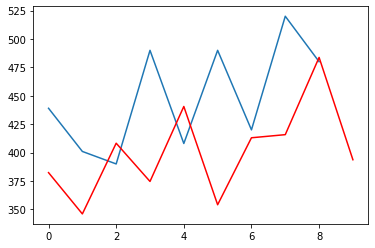

In [137]:
plt.plot(test)
plt.plot(predictions, color='red')

mean squared error

**In summary, the steps of this process are as follows:**

1. Model Identification. Use plots and summary statistics to identify trends, seasonality, and autoregression elements to get an idea of the amount of differencing and the size of the lag that will be required.


2. Parameter Estimation. Use a fitting procedure to find the coefficients of the regression model.
Model Checking. Use plots and statistical tests of the residual errors to determine the amount and type of temporal structure not captured by the model.


3. The process is repeated until either a desirable level of fit is achieved on the in-sample or out-of-sample observations (e.g. training or test datasets).